In [54]:
#Import Modules
from random import random
from random import randrange
import merge_sort  # My custom module
import selection  # My custom module
import statistics as stats
import matplotlib.pyplot as plt
import matplotlib.style as sty
import math  #For validation

sty.use("fivethirtyeight")  # Use five-thirty-eight blog style
%matplotlib inline  

# Merge Sort Example

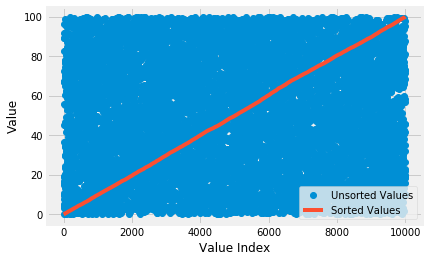

In [63]:
n = 10000
maxV = 100  #Max range of random number
rand_array = [maxV*random() for p in range(0, n)]
plt.plot(rand_array,marker="o",linestyle="None");
plt.plot(merge_sort.sort(rand_array));
plt.legend(["Unsorted Values","Sorted Values"],loc='lower right');
plt.xlabel("Value Index");
plt.ylabel("Value");

In [64]:
sorted_array,merge_sort_ops = merge_sort.sort(rand_array,out_ops = True)  #Do merge sort

print("Median from Merge Sort: " + repr(sorted_array[math.ceil(len(sorted_array)/2)-1]))
print("Number of operations for Merge Sort: "+repr(merge_sort_ops))
print("")
select_median,select_ops = selection.select(rand_array,out_ops = True)
print("Median from Select: " + repr(select_median))
print("Number of operations for Select: "+repr(select_ops))
print("")
print("Median from python built-in statistics module: ",repr(stats.median_low(rand_array)))

Median from Merge Sort: 49.769375620549816
Number of operations for Merge Sort: 120521

Median from Select: 49.769375620549816
Number of operations for Select: 35860

Median from python built-in statistics module:  49.769375620549816


## Discussion

The results above shows the median computed from doing a full merge-sort, select, and the built-in median as a validation of the correctness of both median computations. Furthemore, the number of operations required for a full merge-sort and select algorithms are shown. The select algorithm requires far fewer operations than the full merge-sort. This is, however, only an example for one random array, so let's try to summarize our results for a set of arrays!

## Experiment overview:

In order to get a good idea about the number of operations required to find the lower median as a function of N, we'll compute 100 medians (each from a random array) for N = 1:20:1000. For each N, we'll find the average number of operations required to compute the median using both the merge-sort and selection algorithms. We'll then plot a comparison.

In [79]:
nRuns = 100
N = range(1,10000,100)
merge_sort_avg_ops = []  # List to hold average ops as a function of N
select_avg_ops = []  # List to hold average ops as a function of N

for iN in N:
    c_merge_ops = 0
    c_select_ops = 0
    for iRuns in range(1,nRuns+1):
        rand_array = [maxV*random() for p in range(0, iN)]  # Generate random array of size N
        _,merge_sort_ops = merge_sort.sort(rand_array,out_ops = True)  # Compute merge-sort operations
        _,select_ops = selection.select(rand_array,out_ops = True)  # Compute select operations
        c_merge_ops+=merge_sort_ops
        c_select_ops+=select_ops
    merge_sort_avg_ops.append(c_merge_ops/nRuns)  # Find average # of ops for merge-sort for array of size N
    select_avg_ops.append(c_select_ops/nRuns)  # Find average # of ops for select for array of size N



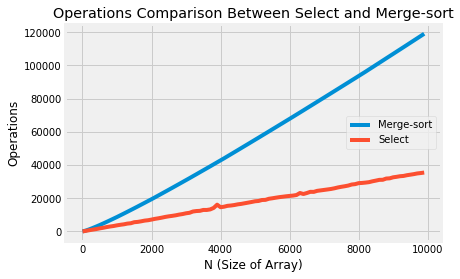

In [92]:
plt.plot(N,merge_sort_avg_ops);  # Plot average ops as a function of N using merge-sort
plt.plot(N,select_avg_ops);  # Plot average ops as a function of N using select
plt.legend(["Merge-sort","Select"],loc="center right");
plt.xlabel("N (Size of Array)");
plt.ylabel("Operations");
plt.title('Operations Comparison Between Select and Merge-sort');

## Discussion

The results above show a larger-scale simulation to compare the number of operations required for merge-sort and select algorithms. Though we haven't explicitely performed a linear or exponential curve fit, it appears from the plot that the select curve is linear, and the merge-sort curve is somewhere between linear and exponential (N*log(N))? 

We can figure out what kind of average complexities the algorithms are by computing C as a function of N for a given complexity (write more info here). If C remains constant as a function of N, then that type of average complexity is correct - otherwise, it's not. We will do this for N and NlogN

If linear complexity:
$C = \dfrac{ops}{N}$

If $N\log(N)$ complexity:
$C = \dfrac{ops}{N\log(N)}$

If $N^2$ complexity:
$C = \dfrac{ops}{N^2}$

Text(0,0.5,'log(C)')

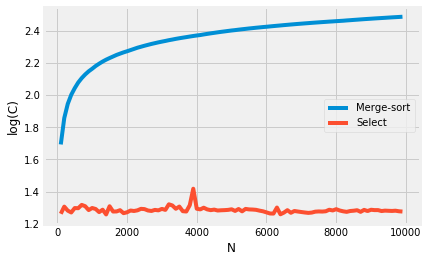

In [129]:
# C if N
c_merge = []
c_select = []
len(merge_sort_avg_ops)
for i in range(len(N)-1):
    c_merge.append(math.log(merge_sort_avg_ops[i+1]/(N[i+1])))
    c_select.append(math.log(select_avg_ops[i+1]/(N[i+1])))
    
plt.plot(N,[None]+c_merge);  # Plot average ops as a function of N using merge-sort
plt.plot(N,[None]+c_select);  # Plot average ops as a function of N using select
plt.legend(["Merge-sort","Select"],loc="center right");
plt.xlabel('N');
plt.ylabel('log(C)');

Text(0,0.5,'log(C)')

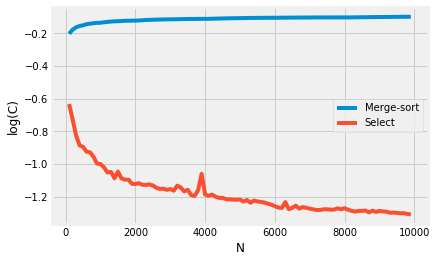

In [128]:
# C if NlogN
c_merge = []
c_select = []
len(merge_sort_avg_ops)
for i in range(len(N)-1):
    c_merge.append(math.log(merge_sort_avg_ops[i+1]/(N[i+1]*math.log2(N[i+1]))))
    c_select.append(math.log(select_avg_ops[i+1]/(N[i+1]*math.log2(N[i+1]))))
    
plt.plot(N,[None]+c_merge);  # Plot average ops as a function of N using merge-sort
plt.plot(N,[None]+c_select);  # Plot average ops as a function of N using select
plt.legend(["Merge-sort","Select"],loc="center right");
plt.xlabel('N');
plt.ylabel('log(C)');

Text(0,0.5,'log(C)')

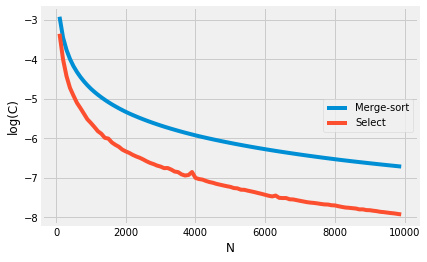

In [127]:
# C if N^2
c_merge = []
c_select = []
len(merge_sort_avg_ops)
for i in range(len(N)-1):
    c_merge.append(math.log(merge_sort_avg_ops[i+1]/(N[i+1]*N[i+1])))
    c_select.append(math.log(select_avg_ops[i+1]/(N[i+1]*N[i+1])))
    
plt.plot(N,[None]+c_merge);  # Plot average ops as a function of N using merge-sort
plt.plot(N,[None]+c_select);  # Plot average ops as a function of N using select
plt.legend(["Merge-sort","Select"],loc="center right");
plt.xlabel('N');
plt.ylabel('log(C)');